<a href="https://colab.research.google.com/github/dilp90/PhD_ExperimentalSetup/blob/main/4thSemester/EMG_Switching_ControlScheme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/E1.txt')

In [ ]:
df.columns = ['EMG']

In [ ]:
print(df["EMG"])

0        1.068115e-06
1       -3.204346e-06
2       -4.425049e-06
3       -9.155273e-07
4       -3.204346e-06
             ...     
16356    6.103516e-07
16357    1.983643e-06
16358   -5.187988e-06
16359   -5.187988e-06
16360   -7.629395e-06
Name: EMG, Length: 16361, dtype: float64


In [ ]:
x = np.linspace(0, 100, 16361)  # Genera 100 puntos entre 0 y 10
y = df["EMG"]  # Calcula el seno de cada punto

In [ ]:
len(x)

16361

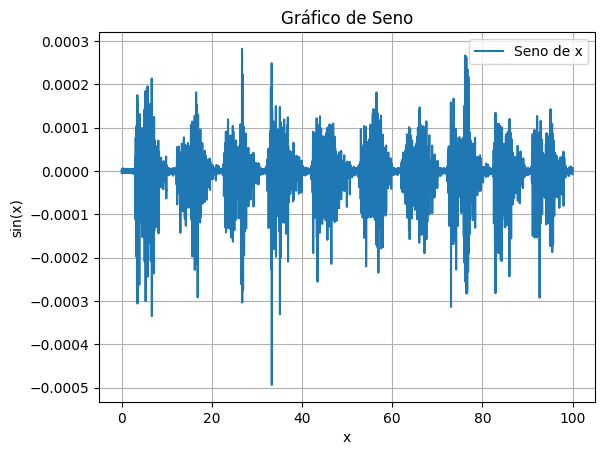

In [ ]:
plt.plot(x, y, label="Seno de x")  # Dibuja el gráfico
plt.title("Gráfico de Seno")  # Título
plt.xlabel("x")  # Etiqueta del eje x
plt.ylabel("sin(x)")  # Etiqueta del eje y
plt.legend()  # Muestra la leyenda
plt.grid(True)  # Muestra la cuadrícula
plt.show()  # Muestra el gráfico

In [ ]:
y_abs = np.abs(y)

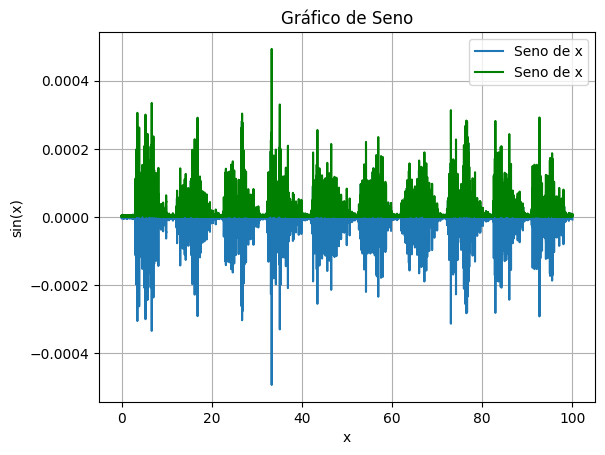

In [ ]:
plt.plot(x, y, label="Seno de x", )  # Dibuja el gráfico
plt.plot(x, y_abs, label="Seno de x", color="green")  # Dibuja el gráfico
plt.title("Gráfico de Seno")  # Título
plt.xlabel("x")  # Etiqueta del eje x
plt.ylabel("sin(x)")  # Etiqueta del eje y
plt.legend()  # Muestra la leyenda
plt.grid(True)  # Muestra la cuadrícula
plt.show()  # Muestra el gráfico

In [ ]:
#Filtro de promedio móvil
signal = y_abs

# Definir el tamaño de la ventana del filtro (por ejemplo, 10 muestras)
window_size = 75
window = np.ones(window_size) / window_size  # Ventana de media móvil

# Aplicar el filtro de promedio móvil
filtered_signal = np.convolve(signal, window, mode='same')

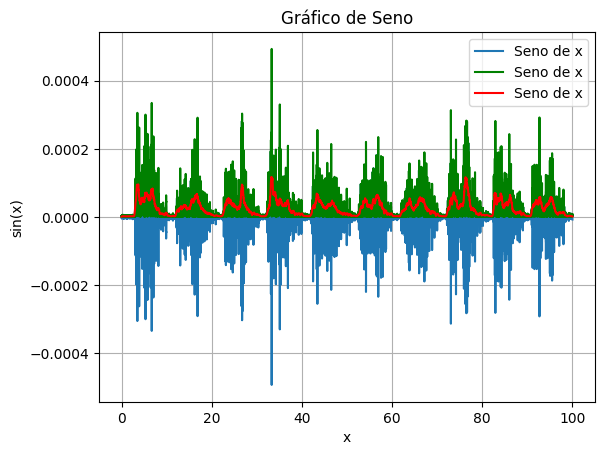

In [ ]:
plt.plot(x, y, label="Seno de x", )  # Dibuja el gráfico
plt.plot(x, y_abs, label="Seno de x", color="green")  # Dibuja el gráfico
plt.plot(x, filtered_signal, label="Seno de x", color="red")  # Dibuja el gráfico
plt.title("Gráfico de Seno")  # Título
plt.xlabel("x")  # Etiqueta del eje x
plt.ylabel("sin(x)")  # Etiqueta del eje y
plt.legend()  # Muestra la leyenda
plt.grid(True)  # Muestra la cuadrícula
plt.show()  # Muestra el gráfico

In [ ]:
# Aplicar umbral
activation = np.zeros(len(filtered_signal))
u = 1.05e-5

for i in range(len(filtered_signal)):
  if filtered_signal[i] > u:
    activation[i] = 1
  else:
    activation[i] = 0


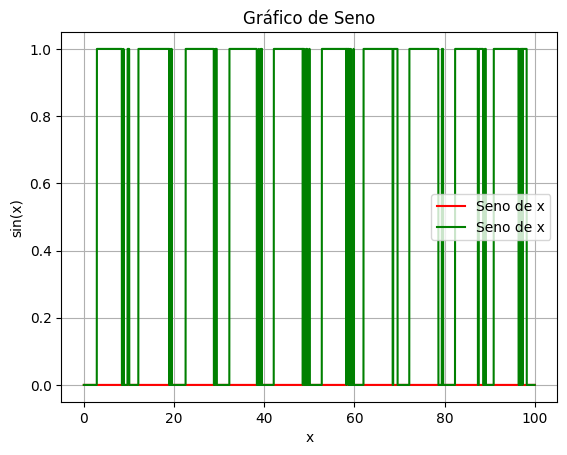

In [ ]:

plt.plot(x, filtered_signal, label="Seno de x", color="red")  # Dibuja el gráfico
plt.plot(x, activation, label="Seno de x", color="green")  # Dibuja el gráfico

plt.title("Gráfico de Seno")  # Título
plt.xlabel("x")  # Etiqueta del eje x
plt.ylabel("sin(x)")  # Etiqueta del eje y
plt.legend()  # Muestra la leyenda
plt.grid(True)  # Muestra la cuadrícula
plt.show()  # Muestra el gráfico